# Statistical Simulations 

In this notebook we will go through some methods that can be used for simulating data generation processes. Here, to simulate different types of random variables we will be utilizing nothing fancy but some standard functions from `numpy.random` module. 

For more information refer to the official docs:
https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random

Note that this notebook was inspired by DataCamp course on Statistical Simulations.

## Simulations

* Allows us to model real-world events. 

**Simulation steps:**

1. Define possible outcomes for random variables
2. Assign probabilities.
3. Define relationships between random variables.
4. Get multriple outcomes by repeated random sampling
5. Analyze sample outcomes.


Discrete Probability Distributions

* Poisson
* Binomial

In [2]:
import numpy as np

In [3]:
## Poisson
# Initialize seed and parameters
np.random.seed(123) 
lam, size_1, size_2 = 5, 3, 1000  

# Draw samples & calculate absolute difference between lambda and sample mean
samples_1 = np.random.poisson(lam, size_1)
samples_2 = np.random.poisson(lam, size_2)
answer_1 = abs(lam - np.mean(samples_1))
answer_2 = abs(lam - np.mean(samples_2))

print("|Lambda - sample mean| with {} samples is {} and with {} samples is {}. ".format(size_1, answer_1, size_2, answer_2))


|Lambda - sample mean| with 3 samples is 0.33333333333333304 and with 1000 samples is 0.07699999999999996. 


In [4]:
# shuffling the deck of cards

deck_of_cards = [('Diamond', 9), ('Spade', 9), ('Spade', 4), ('Club', 11), ('Club', 5), ('Heart', 11), ('Club', 8), ('Club', 0), ('Diamond', 4), ('Heart', 0), ('Heart', 5), ('Heart', 10), ('Spade', 10), ('Heart', 8), ('Heart', 12), ('Spade', 5), ('Spade', 11), ('Heart', 1), ('Heart', 6), ('Spade', 3), ('Diamond', 1), ('Spade', 0), ('Diamond', 5), ('Club', 2), ('Spade', 1), ('Diamond', 10), ('Heart', 7), ('Club', 7), ('Diamond', 11), ('Heart', 3), ('Club', 10), ('Diamond', 7), ('Heart', 4), ('Club', 3), ('Diamond', 8), ('Club', 1), ('Diamond', 12), ('Club', 12), ('Diamond', 0), ('Diamond', 2), ('Heart', 9), ('Spade', 6), ('Spade', 7), ('Club', 9), ('Diamond', 3), ('Club', 6), ('Club', 4), ('Spade', 12), ('Spade', 8), ('Spade', 2), ('Heart', 2), ('Diamond', 6)]

# Shuffle the deck
np.random.shuffle(deck_of_cards)

# Print out the top three cards
card_choices_after_shuffle = deck_of_cards[:3]
print(card_choices_after_shuffle)


[('Club', 12), ('Heart', 5), ('Heart', 9)]


**Throwing a fair die**

Once you grasp the basics of designing a simulation, you can apply it to any system or process. Next, we will learn how each step is implemented using some basic examples.

As we have learned, simulation involves repeated random sampling. The first step then is to get one random sample. Once we have that, all we do is repeat the process multiple times. This exercise will focus on understanding how we get one random sample. We will study this in the context of throwing a fair six-sided die.

By the end of this exercise, you will be familiar with how to implement the first two steps of running a simulation - defining a random variable and assigning probabilities.

In [7]:
# Define die outcomes and probabilities
die, probabilities, throws = [1,2,3,4,5,6], [1./6.,1./6.,1./6.,1./6.,1./6.,1./6.], 1

# Use np.random.choice to throw the die once and record the outcome
outcome = np.random.choice(die, size=1, p=probabilities)
print("Outcome of the throw: {}".format(outcome[0]))

Outcome of the throw: 3


In [ ]:
# Initialize number of dice, simulate & record outcome
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
outcomes = np.random.choice(die, size=2, p=probabilities) 

# Win if the two dice show the same number
if outcomes[0] == outcomes[1]: 
    answer = 'win' 
else:
    answer = 'lose'

print("The dice show {} and {}. You {}!".format(outcomes[0], outcomes[1], answer))

In [ ]:
# Initialize model parameters & simulate dice throw
die, probabilities, num_dice = [1,2,3,4,5,6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 2
sims, wins = 100, 0

for i in range(sims):
    outcomes = np.random.choice(die, size=2, p=probabilities)  
    # Increment `wins` by 1 if the dice show same number
    if outcomes[0]==outcomes[1]: 
        wins = wins + 1 

print("In {} games, you win {} times".format(sims, wins))

We will use simulations to figure out whether or not we want to buy a lottery ticket. Suppose you have the opportunity to buy a lottery ticket which gives you a shot at a grand prize of 10,000. 
Since there are 1000 tickets in total, your probability of winning is 1 in 1000. Each ticket costs 10. Let's use our understanding of basic simulations to first simulate one drawing of the lottery.

In [8]:
# Pre-defined constant variables
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000

# Probability of winning
chance_of_winning = 1/1000

# Simulate a single drawing of the lottery
gains = [-lottery_ticket_cost, grand_prize-lottery_ticket_cost]
probability = [1-chance_of_winning, chance_of_winning]
outcome = np.random.choice(a=gains, size=1, p=probability, replace=True)

print("Outcome of one drawing of the lottery is {}".format(outcome))

Outcome of one drawing of the lottery is [-10]


Repeating the process gives us multiple outcomes. We can think of this as multiple universes where the same lottery drawing occurred. We can then determine the average winnings across all these universes. If the average winnings are greater than what we pay for the ticket then it makes sense to buy it, otherwise, we might not want to buy the ticket.

This is typically how simulations are used for evaluating business investments. After completing this exercise, you will have the basic tools required to use simulations for decision-making.

In [ ]:
# Initialize size and simulate outcome
lottery_ticket_cost, num_tickets, grand_prize = 10, 1000, 10000
chance_of_winning = 1/num_tickets
size = 2000
payoffs = [-10,10000-10]
probs = [1-chance_of_winning,chance_of_winning]

outcomes = np.random.choice(a=payoffs, size=size, p=probs, replace=True)

# Mean of outcomes.
answer = outcomes.mean()
print("Average payoff from {} simulations = {}".format(size, answer))

Calculating a break-even lottery price
Simulations allow us to ask more nuanced questions that might not necessarily have an easy analytical solution. Rather than solving a complex mathematical formula, we directly get multiple sample outcomes. We can run experiments by modifying inputs and studying how those changes impact the system. For example, once we have a moderately reasonable model of global weather patterns, we could evaluate the impact of increased greenhouse gas emissions.

In the lottery example, we might want to know how expensive the ticket needs to be for it to not make sense to buy it. To understand this, we need to modify the ticket cost to see when the expected payoff is negative.

grand_prize, num_tickets, and chance_of_winning are loaded in the environment.

In [9]:
# Initialize simulations and cost of ticket
sims, lottery_ticket_cost = 3000, 0

# Use a while loop to increment `lottery_ticket_cost` till average value of outcomes falls below zero
while 1:
    outcomes = np.random.choice([-lottery_ticket_cost, grand_prize-lottery_ticket_cost],
                 size=sims, p=[1-chance_of_winning, chance_of_winning], replace=True)
    if outcomes.mean() < 0:
        break
    else:
        lottery_ticket_cost += 1
answer = lottery_ticket_cost - 1

print("The highest price at which it makes sense to buy the ticket is {}".format(answer))

The highest price at which it makes sense to buy the ticket is 6


## Simulations for Probability Estimation

Steps:

1. Construct sample space or population
2. Determine how to simulate one outcome
3. Determine rule for success
4. sample repeatedly and count successes
5. Calculate frequency of successes to estimate probability


In [11]:
4/52 + 13/52 - 1/52


0.3076923076923077

Two of a kind
Now let's use simulation to estimate probabilities. Suppose you've been invited to a game of poker at your friend's home. In this variation of the game, you are dealt five cards and the player with the better hand wins. You will use a simulation to estimate the probabilities of getting certain hands. Let's work on estimating the probability of getting at least two of a kind. Two of a kind is when you get two cards of different suites but having the same numeric value (e.g., 2 of hearts, 2 of spades, and 3 other cards).

By the end of this exercise, you will know how to use simulation to calculate probabilities for card games.

In [ ]:
# Shuffle deck & count card occurrences in the hand
n_sims, two_kind = 10000, 0
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for [suite, numeric_value] in hand:
        # Count occurrences of each numeric value
        cards_in_hand[numeric_value] = cards_in_hand.get(numeric_value, 0) + 1
    
    # Condition for getting at least 2 of a kind
    if np.max(list(cards_in_hand.values())) >=2: 
        two_kind += 1

print("Probability of seeing at least two of a kind = {} ".format(two_kind/n_sims))

**Game of thirteen**

A famous French mathematician Pierre Raymond De Montmart, who was known for his work in combinatorics, proposed a simple game called as Game of Thirteen. You have a deck of 13 cards, each numbered from 1 through 13. Shuffle this deck and draw cards one by one. A coincidence is when the number on the card matches the order in which the card is drawn. For instance, if the 5th card you draw happens to be a 5, it's a coincidence. You win the game if you get through all the cards without any coincidences. Let's calculate the probability of winning at this game using simulation.

By completing this exercise, you will further strengthen your ability to cast abstract problems into the simulation framework for estimating probabilities.

* For each drawing, draw all the cards in deck without replacement and assign to draw.
* Check if there are any coincidences in the draw and, if there are, increment the coincidences counter by 1.
* Calculate winning probability as the fraction of games without any coincidences and use prob_of_winning to print your results.

In [11]:
# Pre-set constant variables
deck, sims, coincidences = np.arange(1, 14), 10000, 0

for i in range(sims):
    # Draw all the cards without replacement to simulate one game
    draw = np.random.choice(deck, size=13, replace=False)
    # Check if there are any coincidences
    coincidence = (draw == list(np.arange(1, 14))).any()
    if coincidence == True: 
        coincidences += 1

# Calculate probability of winning
prob_of_winning = (10000 - coincidences)/10000
print("Probability of winning = {}".format(prob_of_winning))

Probability of winning = 0.359


### The conditional urn

As we've learned, conditional probability is defined as the probability of an event given another event. To illustrate this concept, let's turn to an urn problem.

We have an urn that contains 7 white and 6 black balls. Four balls are drawn at random. We'd like to know the probability that the first and third balls are white, while the second and the fourth balls are black.

Upon completion, you will learn to manipulate simulations to calculate simple conditional probabilities.

Instructions

- Initialize the counter success to 0 and sims to 5000.
- Define a list, urn, with 7 white balls ('w') and 6 black balls ('b').
- Draw 4 balls without replacement and check to see if the first and third are white and second and fourth are black.
- Increment success if the above criterion is met.

In [13]:
# Initialize success, sims and urn
success, sims = 0, 5000
urn = ['w' for i in range(7)] + ['b' for i in range(6)]

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0]=='w') & (draw[2]=='w') & (draw[1]=='b')& (draw[3]=='b'): 
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.076


## Birthday problem

Now we'll use simulation to solve a famous probability puzzle - the birthday problem. It sounds quite straightforward - How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. Simulation gives us an elegant way of solving this problem.

Upon completion of this exercise, you will begin to understand how to cast problems in a simulation framework.

- Initialize the sample space days which is an array from 1 to 365.
- Define a function birthday_sim() that takes one input people and returns the probability that at least two share the same birthday. Set size of draw to number of people.

In [14]:
# Draw a sample of birthdays & check if each birthday is unique
days = [i for i in range(1,366)]
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0 
    for i in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw) == len(set(draw)): 
            unique_birthdays += 1
    out = 1 - unique_birthdays / sims
    return out

In [15]:
birthday_sim(people)

0.0020000000000000018

In [16]:
# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 23 people, there's a 50% chance that two share a birthday.


## Full house

Let's return to our poker game. Last time, we calculated the probability of getting at least two of a kind. This time we are interested in a full house. A full house is when you get two cards of different suits that share the same numeric value and three other cards that have the same numeric value (e.g., 2 of hearts & spades, jacks of clubs, diamonds, & spades).

Thus, a full house is the probability of getting exactly three of a kind conditional on getting exactly two of a kind of another value. Using the same code as before, modify the success condition to get the desired output. This exercise will teach you to estimate conditional probabilities in card games and build your foundation in framing abstract problems for simulation.


- Shuffle deck_of_cards.
- Utilize a dictionary with .get() to count the number of occurrences of each card in the hand.
- Increment the counter full_house when there is a full house in the hand (2 of one kind, 3 of the other).

In [24]:
deck = [('Heart', 0), ('Heart', 1), ('Heart', 2), ('Heart', 3), ('Heart', 4), ('Heart', 5), ('Heart', 6), ('Heart', 7), ('Heart', 8), ('Heart', 9), ('Heart', 10), ('Heart', 11), ('Heart', 12), ('Club', 0), ('Club', 1), ('Club', 2), ('Club', 3), ('Club', 4), ('Club', 5), ('Club', 6), ('Club', 7), ('Club', 8), ('Club', 9), ('Club', 10), ('Club', 11), ('Club', 12), ('Spade', 0), ('Spade', 1), ('Spade', 2), ('Spade', 3), ('Spade', 4), ('Spade', 5), ('Spade', 6), ('Spade', 7), ('Spade', 8), ('Spade', 9), ('Spade', 10), ('Spade', 11), ('Spade', 12), ('Diamond', 0), ('Diamond', 1), ('Diamond', 2), ('Diamond', 3), ('Diamond', 4), ('Diamond', 5), ('Diamond', 6), ('Diamond', 7), ('Diamond', 8), ('Diamond', 9), ('Diamond', 10), ('Diamond', 11), ('Diamond', 12)]


In [26]:
#Shuffle deck & count card occurrences in the hand
n_sims, full_house, deck_of_cards = 50000, 0, deck.copy() 
for i in range(n_sims):
    np.random.shuffle(deck_of_cards)
    hand, cards_in_hand = deck_of_cards[0:5], {}
    for card in hand:
        # Use .get() method to count occurrences of each card
        cards_in_hand[card[1]] = cards_in_hand.get(card[1], 0) + 1
        
    # Condition for getting full house
    condition = (max(cards_in_hand.values()) ==3) & (min(cards_in_hand.values())==2)
    if condition: 
        full_house +=1
print("Probability of seeing a full house = {}".format(full_house/n_sims))

Probability of seeing a full house = 0.00146


## Data Generating Process

### Driving test

Through the next exercises, we will learn how to build a data generating process (DGP) through progressively complex examples.

In this exercise, you will simulate a very simple DGP. Suppose that you are about to take a driving test tomorrow. Based on your own practice and based on data you have gathered, you know that the probability of you passing the test is 90% when it's sunny and only 30% when it's raining. Your local weather station forecasts that there's a 40% chance of rain tomorrow. Based on this information, you want to know what is the probability of you passing the driving test tomorrow.

This is a simple problem and can be solved analytically. Here, you will learn how to model a simple DGP and see how it can be used for simulation.

In [68]:
sims, outcomes, p_rain, p_pass = 1000, [], 0.40, {'sun':0.9, 'rain':0.3}

def test_outcome(p_rain):  
    # Simulate whether it will rain or not
    weather = np.random.choice(['rain', 'sun'], p=[p_rain, 1 - p_rain])
    # Simulate and return whether you will pass or fail
    test_result = np.random.choice(['pass', 'fail'], p=[p_pass[weather],1-p_pass[weather]])
    return test_result

In [42]:
test_outcome(p_rain)

'pass'

In [ ]:
for i in range(sims):
    outcomes.append(test_outcome(p_rain))

# Calculate fraction of outcomes where you pass
pass_outcomes_frac = outcomes.count('pass')/len(outcomes)
print("Probability of Passing the driving test = {}".format(pass_outcomes_frac))


## National elections
This exercise will give you a taste of how you can model a DGP at different levels of complexity.

Consider national elections in a country with two political parties - Red and Blue. This country has 50 states and the party that wins the most states wins the elections. You have the probability  of Red winning in each individual state and want to know the probability of Red winning nationally.

Let's model the DGP to understand the distribution. Suppose the election outcome in each state follows a binomial distribution with probability  such that  indicates a loss for Red and  indicates a win. We then simulate a number of election outcomes. Finally, we can ask rich questions like what is the probability of Red winning less than 45% of the states?

- Simulate one election using np.random.binomial() with p = probs and n=1. Assign it to election.
- Append the average of Red's wins in election to outcomes.
- Calculate the fraction of outcomes where Red won less than 45% of the states. Save it as prob_red_wins and use it to print your results.

In [46]:
p =[0.52076814, 0.67846401, 0.82731745, 0.64722761, 0.03665174, 0.17835411
 ,0.75296372 ,0.22206157, 0.72778372, 0.28461556, 0.72545221, 0.106571
 ,0.09291364, 0.77535718, 0.51440142, 0.89604586, 0.39376099, 0.24910244
 ,0.92518253, 0.08165597, 0.4212476,  0.74123879, 0.2479099,  0.46125805
 ,0.19584491, 0.24440482, 0.349916,   0.80224624, 0.80186664, 0.82968251
 ,0.91178779, 0.51739059, 0.67338858, 0.15675863, 0.37772308, 0.77134621
 ,0.71727114, 0.92700912, 0.28386132, 0.25502498, 0.30081506, 0.19724585
 ,0.29129564, 0.56623386, 0.97681039, 0.96263926, 0.0548948,  0.14092758
 ,0.54739446, 0.54555576]

np.random.binomial(p = p, n = 1).mean()

0.42

In [78]:
outcomes, sims, probs = [], 1000, p

for i in range(sims):
    # Simulate elections in the 50 states
    election = np.random.binomial(p = probs, n = 1)
    # Get average of Red wins and add to `outcomes`
    outcomes.append(election.mean())

# Calculate probability of Red winning in less than 45% of the states
prob_red_wins = len([i for i in outcomes if i<0.45])/len(outcomes)
print("Probability of Red winning in less than 45% of the states = {}".format(prob_red_wins))

Probability of Red winning in less than 45% of the states = 0.201


## Fitness goals

Let's model how activity levels impact weight loss using modern fitness trackers. On days when you go to the gym, you average around 15k steps, and around 5k steps otherwise. You go to the gym 40% of the time. Let's model the step counts in a day as a Poisson random variable with a mean  dependent on whether or not you go to the gym.

For simplicity, let’s say you have an 80% chance of losing 1lb and a 20% chance of gaining 1lb when you get more than 10k steps. The probabilities are reversed when you get less than 8k steps. Otherwise, there's an even chance of gaining or losing 1lb. Given all this information, find the probability of losing weight in a month.

- Simulate steps as a Poisson random variable for a given day based on the value of lam.
- Set prob to [0.2, 0.8] if steps > 10000 or to [0.8, 0.2] if steps < 8000. Sum up all the weight lost or gained in a month stored in w.
- Calculate and print the fraction of simulations where total weight for a month in outcomes is less than 0. Save as weight_loss_outcomes_frac and use that to print your results.

In [85]:
# Simulate steps & choose prob 
days = 50

for i in range(sims):
    w = []
    for i in range(days):
        lam = np.random.choice([5000, 15000], p=[0.6, 0.4], size=1)
        steps = np.random.poisson(lam)
        if steps > 10000: 
            prob = [0.2, 0.8]
        elif steps < 8000: 
            prob = [0.8, 0.2]
        else:
            prob = [0.5, 0.5]
        w.append(np.random.choice([1, -1], p=prob))
    outcomes.append(sum(w))

# Calculate fraction of outcomes where there was a weight loss
weight_loss_outcomes_frac = len([i for i in outcomes if i<0])/len(outcomes)
print("Probability of Weight Loss = {}".format(weight_loss_outcomes_frac))

Probability of Weight Loss = 0.177


## eCommerce Ad Simulation

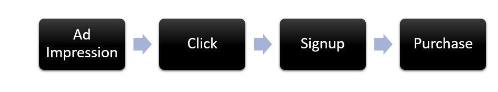

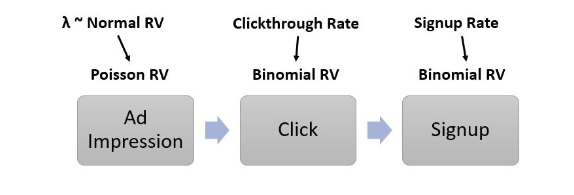

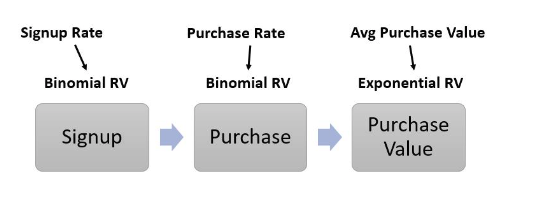

## Sign up Flow

We will now model the DGP of an eCommerce ad flow starting with sign-ups.

On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that  is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability  of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

- Initialize ct_rate and su_rate dictionaries such that the high values are uniformly distributed between the low value and  the low value.
- Model impressions as a Poisson random variable with a mean value lam.
- Model clicks and signups as binomial random variables with n as impressions and clicks and p as ct_rate[cost] and su_rate[cost], respectively.
- We then print the simulated signups for the 'high' cost option

In [86]:
# Initialize click-through rate and signup rate dictionaries

ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam)
    clicks = np.random.binomial(n=impressions, p = ct_rate[cost])
    signups = np.random.binomial(n=clicks, p = su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

Simulated Signups = [232]


## Purchase Flow
After signups, let's model the revenue generation process. Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the purchase_values RV. The revenue, then, is simply the sum of all purchase values.

- Model purchases as a binomial RV with p=0.1.
- Model purchase_values as an exponential RV scale=1000 and the appropriate size.
- Append rev with the sum of purchase_values.

In [97]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size = purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum())
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

Simulated Revenue = $16605.883101873016


## Probability of losing money

In this exercise, we will use the DGP model to estimate probability.

As seen earlier, this company has the option of spending extra money, let's say 3000USD, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra 3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

Once we have simulated revenue outcomes, we can ask a rich set of questions that might not have been accessible using traditional analytical methods.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.

- Initialize cost_diff, the difference between the 'high' and 'low' cost options, to 3000.
- Get the revenue for the high-cost option and assign it to rev_high.
- Calculate the fraction of times when rev_high - rev_low is less than cost_diff. Call it frac and use it to print your results.

In [123]:
# Initialize cost_diff
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff

frac = (np.subtract(rev_high,rev_low)< cost_diff).sum()/sims
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.587


# Resampling methods

There are three main resampling methods:
* Bootstrapping (sampling with replacement)
* Jackknife (leave out one or more data points)
* Permutation Testing (label switching)

### Probability example

In this exercise, we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation, but vary our sampling method to see how it impacts probability.

Consider a bowl filled with colored candies - three blue, two green, and five yellow. Draw three candies, one at a time, with replacement and without replacement. You want to calculate the probability that all three candies are yellow.

- Set up your bowl as a list having three blue 'b', two green 'g' and five yellow 'y' candies.
- Draw a sample of three candies with replacement (sample_rep) and without replacement (sample_no_rep).
- For the sample with replacement, if there are no 'b' or 'g' candies in sample_rep, increment success_rep. Similarly, incrementsuccess_no_rep when there are no 'b' or 'g' candies in sample_no_rep.
- Calculate the respective probabilities as successes divided by number of iterations.

In [2]:
# Set up the bowl
import numpy as np

success_rep, success_no_rep, sims = 0, 0, 10000
bowl = list('b'*3 + 'g'*2 + 'y'*5)

for i in range(sims):
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    if ('b' not in sample_rep) & ('g' not in sample_rep) : 
        success_rep+=1
    if ('b' not in sample_no_rep) & ('g' not in sample_no_rep) : 
        success_no_rep+=1

# Calculate probabilities
prob_with_replacement = success_rep/sims
prob_without_replacement = success_no_rep/sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement, prob_without_replacement))

Probability with replacement = 0.1224, without replacement = 0.0849


## Bootsrapping 

It significantly depends on the initial sample (it should be a good representation of the whole population).
Good to know:
* Run at least 5-10k iterations
* Expect an approximate answer
* Consider bias correction (balanced bootstrap)

## Running a simple bootstrap
Welcome to the first exercise in the bootstrapping section. We will work through an example where we learn to run a simple bootstrap. As we saw in the video, the main idea behind bootstrapping is sampling with replacement.

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% confidence interval (CI) for the average lengths.

Examine the list wrench_lengths, which has 100 observed lengths of wrenches, in the shell.

- Draw a random sample with replacement from wrench_lengths and store it in temp_sample. Set size = len(wrench_lengths).
- Calculate the mean length of each sample, assign it to sample_mean, and then append it to mean_lengths.
- Calculate the bootstrapped mean (boot_mean) and bootstrapped 95% confidence interval (boot_95_ci) by using np.percentile().

In [4]:
wrench_lengths = [ 8.9143694 , 10.99734545, 10.2829785 ,  8.49370529,  9.42139975,
       11.65143654,  7.57332076,  9.57108737, 11.26593626,  9.1332596 ,
        9.32111385,  9.90529103, 11.49138963,  9.361098  ,  9.55601804,
        9.56564872, 12.20593008, 12.18678609, 11.0040539 , 10.3861864 ,
       10.73736858, 11.49073203,  9.06416613, 11.17582904,  8.74611933,
        9.3622485 , 10.9071052 ,  8.5713193 ,  9.85993128,  9.1382451 ,
        9.74438063,  7.20141089,  8.2284669 ,  9.30012277, 10.92746243,
        9.82636432, 10.00284592, 10.68822271,  9.12046366, 10.28362732,
        9.19463348,  8.27233051,  9.60910021, 10.57380586, 10.33858905,
        9.98816951, 12.39236527, 10.41291216, 10.97873601, 12.23814334,
        8.70591468,  8.96121179, 11.74371223,  9.20193726, 10.02968323,
       11.06931597, 10.89070639, 11.75488618, 11.49564414, 11.06939267,
        9.22729129, 10.79486267, 10.31427199,  8.67373454, 11.41729905,
       10.80723653, 10.04549008,  9.76690794,  8.80169886, 10.19952407,
       10.46843912,  9.16884502, 11.16220405,  8.90279695,  7.87689965,
       11.03972709,  9.59663396,  9.87397041,  9.16248328,  8.39403724,
       11.25523737,  9.31113102, 11.66095249, 10.80730819,  9.68524185,
        8.9140976 ,  9.26753801,  8.78747687, 12.08711336, 10.16444123,
       11.15020554,  8.73264795, 10.18103513, 11.17786194,  9.66498924,
       11.03111446,  8.91543209,  8.63652846, 10.37940061,  9.62082357]

In [5]:
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, replace=True, size=len(wrench_lengths))
    sample_mean = temp_sample.mean()
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.031318650305398, 95% CI = [ 9.81006276 10.25539407]


## Non-standard estimators
In the last exercise, you ran a simple bootstrap that we will now modify for more complicated estimators.

Suppose you are studying the health of students. You are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

Examine the pandas DataFrame df with the heights and weights of 1000 students. Using this, calculate the 95% CI for both the median height as well as the correlation between height and weight.

- Use the .sample() method ondf to generate a sample of the data with replacement and assign it to tmp_df.
- For each generated dataset in tmp_df, calculate the median heights and correlation between heights and weights using .median() and .corr().
- Append the median heights to height_medians and correlation to hw_corr.
- Finally calculate the 95% ([2.5, 97.5]) confidence intervals for each of the above quantities using np.percentile().

In [ ]:
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(np.median(tmp_df['heights']))
    hw_corr.append(tmp_df.corr()['heights']['weights'])

# Calculate confidence intervals
height_median_ci = np.percentile(height_medians,[2.5, 97.5])
height_weight_corr_ci = np.percentile(hw_corr,[2.5, 97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format( height_median_ci, height_weight_corr_ci))



# Bootstrapping regression
Now let's see how bootstrapping works with regression. Bootstrapping helps estimate the uncertainty of non-standard estimators. Consider the  statistic associated with a regression. When you run a simple least squares regression, you get a value for . But let's see how can we get a 95% CI for .

Examine the DataFrame df with a dependent variable  and two independent variables  and  using df.head(). We've already fit this regression with statsmodels (sm) using:

reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()
Examine the result using reg_fit.summary() to find that . Use bootstrapping to calculate the 95% CI.

- Draw a bootstrap sample from the original dataset using the sample() method of a pandas DataFrame. The number of rows should be the same as that of the original DataFrame.
- Fit a regression similar to reg_fit() using sm.OLS() and extract the  statistic using the parameter rsquared.
- Append the  to the list rsquared_boot.
- Calculate 95% CI for rsquared_boot as r_sq_95_ci using np.percentile().

In [ ]:
rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
r_sq_95_ci = np.percentile(rsquared_boot,[2.5,97.5])
print("R Squared 95% CI = {}".format(r_sq_95_ci))

# Basic jackknife estimation - mean
Jackknife resampling is an older procedure, which isn't used as often compared as bootstrapping. However, it's still useful to know how to run a basic jackknife estimation procedure. In this first exercise, we will calculate the jackknife estimate for the mean. Let's return to the wrench factory.

You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use jackknife estimation to get the average lengths.

Examine the variable wrench_lengths in the shell.

- Get a jackknife sample by iteratively leaving one observation out of wrench_lengths and assigning it to jk_sample.
- Calculate the mean of jk_sample and append it to mean_lengths.
- Finally, calculate the jackknife estimate mean_lengths_jk as the mean of the mean_lengths array.

In [ ]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]
    mean_lengths.append(np.mean(jk_sample))

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths_jk = np.mean(np.array(mean_lengths))
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))

## Jackknife confidence interval for the median
In this exercise, we will calculate the jackknife 95% CI for a non-standard estimator. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is n-1 times the variance of the individual jackknife sample estimates where n is the number of observations in the original sample.

Returning to the wrench factory, you are now interested in estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.

Let's revisit the code from the previous exercise, but this time in the context of median lengths. By the end of this exercise, you will have a much better idea of how to use jackknife resampling to calculate confidence intervals for non-standard estimators.

- Append the median length of each jackknife sample to median_lengths.
- Calculate the mean of the jackknife estimate of median_length and assign to jk_median_length.
- Calculate the upper 95% confidence interval jk_upper_ci and lower 95% confidence intervals of the median jk_lower_ci using 1.96*np.sqrt(jk_var).

In [ ]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96*np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96*np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

## Permutation testing

Used to determine if A / B groups are different


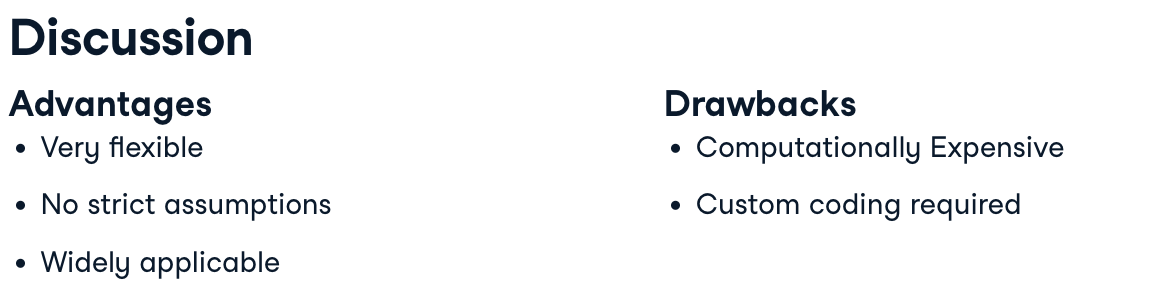

## Generating a single permutation
In the next few exercises, we will run a significance test using permutation testing. As discussed in the video, we want to see if there's any difference in the donations generated by the two designs - A and B. Suppose that you have been running both the versions for a few days and have generated 500 donations on A and 700 donations on B, stored in the variables donations_A and donations_B.

We first need to generate a null distribution for the difference in means. We will achieve this by generating multiple permutations of the dataset and calculating the difference in means for each case.

First, let's generate one permutation and calculate the difference in means for the permuted dataset.

In [ ]:
# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
diff_in_means = np.mean(permuted_A) -np.mean(permuted_B) 
print("Difference in the permuted mean values = {}.".format(diff_in_means))

## Hypothesis testing - Difference of means

We want to test the hypothesis that there is a difference in the average donations received from A and B. Previously, you learned how to generate one permutation of the data. Now, we will generate a null distribution of the difference in means and then calculate the p-value.

For the null distribution, we first generate multiple permuted datasets and store the difference in means for each case. We then calculate the test statistic as the difference in means with the original dataset. Finally, we approximate the p-value by calculating twice the fraction of cases where the difference is greater than or equal to the absolute value of the test statistic (2-sided hypothesis). A p-value of less than say 0.05 could then determine statistical significance.

- Generate multiple permutations of donations_A & donations_B & assign it to perm.
- Set samples equal to the difference in means of permuted_A_datasets & permuted_B_datasets. We set axis=1 to have a mean for each dataset instead of an overall mean.
- Set test_stat equal to the difference in means of donations_A & donations_B.
- Calculate p-value p_val as twice the fraction of samples greater than or equal to the absolute value of test_stat.

In [ ]:
# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value
test_stat = np.mean(donations_A)-np.mean(donations_B)
p_val = 2*np.sum(samples >= np.abs(test_stat))/reps
print("p-value = {}".format(p_val))

## Hypothesis testing - Non-standard statistics

In the previous two exercises, we ran a permutation test for the difference in mean values. Now let's look at non-standard statistics.

Suppose that you're interested in understanding the distribution of the donations received from websites A and B. For this, you want to see if there's a statistically significant difference in the median and the 80th percentile of the donations. Permutation testing gives you a wonderfully flexible framework for attacking such problems.

Let's go through running a test to see if there's a difference in the median and the 80th percentile of the distribution of donations. As before, you're given the donations from the websites A and B in the variables donations_A and donations_B respectively.

- Set samples_percentile and samples_median equal to the difference in the 80th percentile and medians of permuted_A_datasets and permuted_B_datasets, respectively.
- Set test_stat_percentile equal to the difference in 80th percentile and test_stat_median equal to the difference in medians of donations_A and donations_B. The variables donations_A and donations_B have been pre-loaded.
- Calculate p_val_median as 2  fraction of cases where sample median is greater than or equal to the median test statistic. Perform a similar calculation for p_val_percentile.

In [6]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1) - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1) - np.median(permuted_B_datasets, axis=1)
# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80) - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)

p_val_percentile = 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/reps
p_val_median = 2*np.sum(samples_median >= np.abs(test_stat_median))/reps

print("80th Percentile: test statistic = {}, p-value = {}".format(test_stat_percentile, p_val_percentile))
print("Median: test statistic = {}, p-value = {}".format(test_stat_median, p_val_median))





NameError: name 'permuted_A_datasets' is not defined

# Simulation for Business Planning

* Monte Carlo Integration
* Simulation for Power Analysis
* Portfolio Simulation

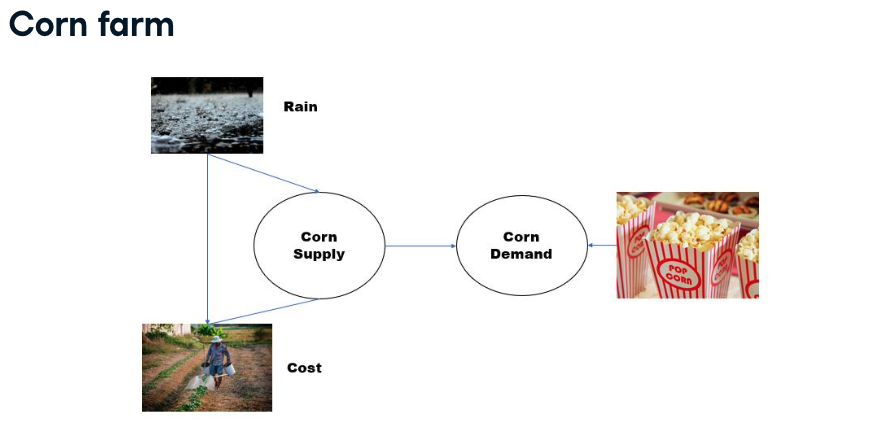

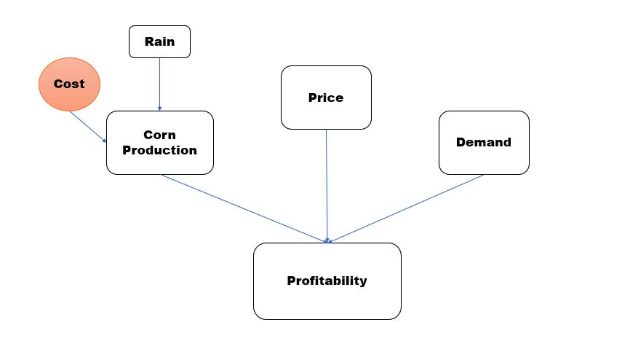

## Modeling Corn Production
Suppose that you manage a small corn farm and are interested in optimizing your costs. In this illustrative exercise, we will model the production of corn. We'll abstract away from details like units and focus on the process.

For simplicity, let's assume that corn production depends on only two factors: rain, which you don't control, and cost, which you control. Rain is normally distributed with mean 50 and standard deviation 15. For now, let's fix cost at 5,000. Let's assume that corn produced in any season is a Poisson random variable and that the average corn production is governed by the equation:

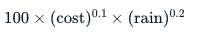

Let's model this production function and simulate one outcome.

### Instructions 
- Initialize rain as a Normal random variable with mean 50 and standard deviation 15.
- In the corn_produced() function, model mean_corn as .
- Model corn as a Poisson random variable with mean mean_corn.
- Simulate one outcome by storing the result of calling corn_produced() in corn_result and print your results.

In [2]:
# Initialize variables
import numpy as np

cost = 5000
rain = np.random.normal(50,15)

# Corn Production Model
def corn_produced(rain, cost):
    mean_corn = 100 * cost**(0.1)*rain**(0.2)
    corn = np.random.poisson(mean_corn)
    return corn

# Simulate and print corn production
corn_result = corn_produced(rain, cost)
print("Simulated Corn Production = {}".format(corn_result))

Simulated Corn Production = 528


## Modeling Profits

In the previous exercise, you built a model of corn production. For a small farm, you typically have no control over the price or demand for corn. Suppose that price is normally distributed with mean 40 and standard deviation 10. You are given a function corn_demanded(), which takes the price and determines the demand for corn. This is reasonable because demand is usually determined by the market and is not in your control.

In this exercise, you will work on a function to calculate the profit by pulling together all the other simulated variables. The only input to this function will be the fixed cost of production. Upon completion, you'll have a function that gives one simulated profit outcome for a given cost. This function can then be used for planning your costs.

### Instructions:

- Model the price as a normal random variable with mean 40 and standard deviation 10.
- Get the corn supply by calling the function corn_produced(rain, cost), which you designed in the previous exercise.
- Call the corn_demanded() function with input price to get demand.
- Profit  quantity  price  cost. If more corn is produced than demanded (supply > demand), then quantity sold will be demand, else it will be supply.

In [33]:
def corn_demanded(price):
    return 200

In [34]:
# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40, 10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price)
    equil_short = supply <= demand
    if equil_short == True:
        tmp = supply*price - cost
        return tmp
    else: 
        tmp2 = demand*price - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {}".format(result))

Simulated profit = 2596.8580844834005


## Optimizing Costs

Now we will use the functions you've built to optimize our cost of production. We are interested in maximizing average profits. However, our profits depend on a number of factors, while we only control cost. Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted.

Since you manage the small corn farm, you have the ability to choose your cost - from 100 to 5,000. You want to choose the cost that gives you the maximum average profit. In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. Upon completion, you will have a framework for selecting optimal inputs for business decisions.

### Instructions

- Initialize the empty dictionary results.
- For each cost level, simulate profits using the pre-loaded profits() function and append them to tmp_profits.
- Store the average of tmp_profits for each cost level in the results dictionary.
- Find the cost level cost_max that has the maximum average profit by running results through the list comprehension.

In [35]:
# Initialize results and cost_levels variables
sims, results = 1000, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = []
    for i in range(sims):
        tmp_profits.append(profits(cost))
    results[cost] = np.mean(tmp_profits)
    
# Get the cost that maximizes average profit
cost_max = [x for x in results.keys() if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}".format(cost_max))

/var/folders/lz/xl4dh0dx24v8w37756gky0540000gn/T/ipykernel_3496/956514145.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  corn = np.random.poisson(mean_corn)


AttributeError: 'list' object has no attribute 'keys'

## Monte Carlo Integration
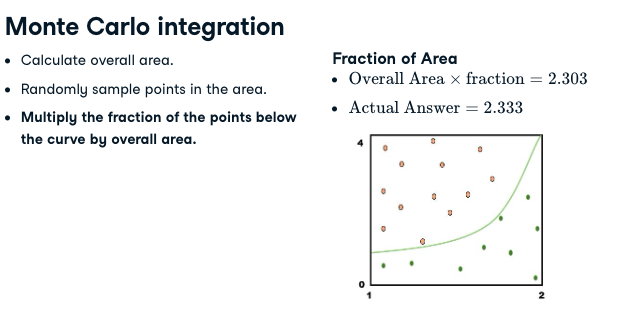


## Integrating a Simple Function


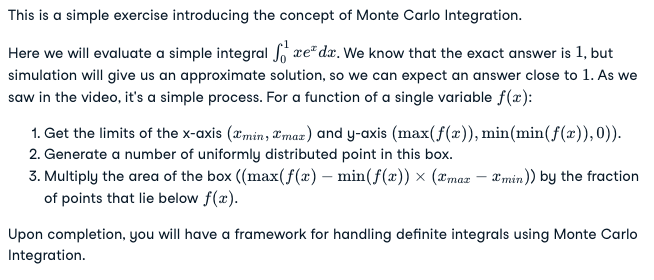

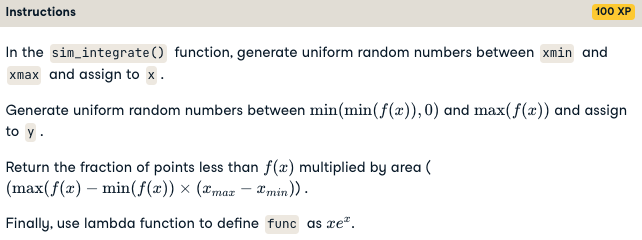


In [49]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)),0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result
    
# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x*np.exp(x), xmin = 0, xmax = 1, sims = 1000)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.9784926691641448, Actual Answer = 1


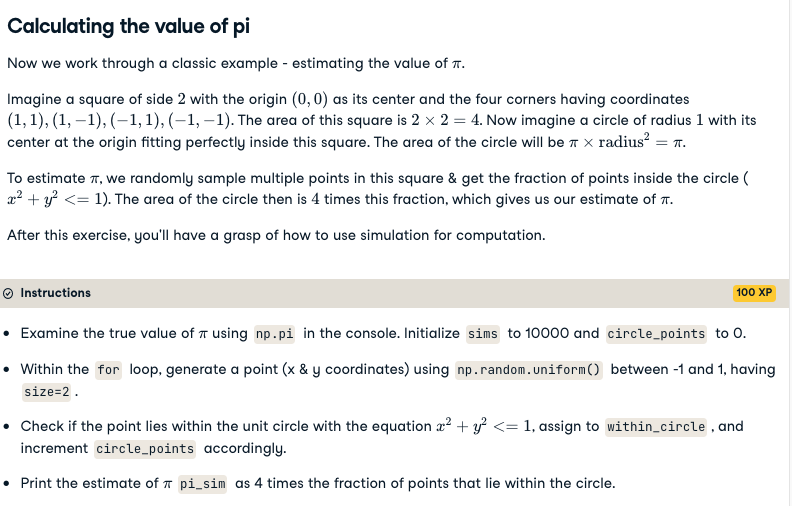

Calculating the value of pi
Now we work through a classic example - estimating the value of .

Imagine a square of side  with the origin  as its center and the four corners having coordinates . The area of this square is . Now imagine a circle of radius  with its center at the origin fitting perfectly inside this square. The area of the circle will be 
.

To estimate , we randomly sample multiple points in this square & get the fraction of points inside the circle (
). The area of the circle then is  times this fraction, which gives us our estimate of .

After this exercise, you'll have a grasp of how to use simulation for computation.

Instructions
100 XP
Examine the true value of  using np.pi in the console. Initialize sims to 10000 and circle_points to 0.
Within the for loop, generate a point (x & y coordinates) using np.random.uniform() between -1 and 1, having size=2.
Check if the point lies within the unit circle with the equation 
, assign to within_circle, and increment circle_points accordingly.
Print the estimate of  pi_sim as 4 times the fraction of points that lie within the circle.



In [57]:
# Initialize sims and circle_points
sims, circle_points = 10000, 0 

for i in range(sims):
    # Generate the two coordinates of a point
    point = np.random.uniform(-1,1,size=2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4*circle_points/sims
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.142


## Simulation for Power Analysis

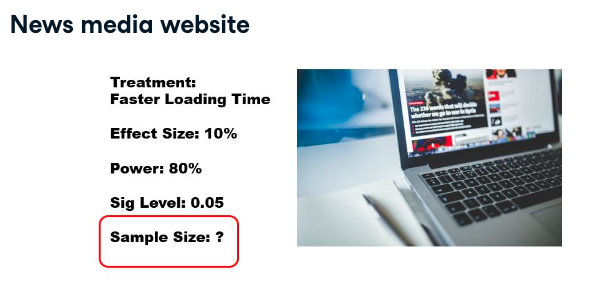

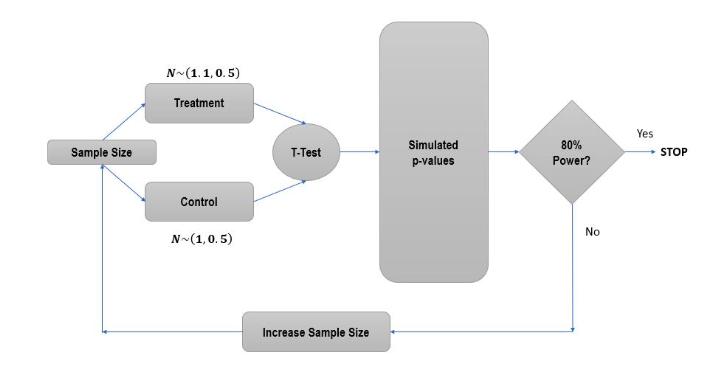

## Power Analysis - Part I

Now we turn to power analysis. You typically want to ensure that any experiment or A/B test you run has at least 80% power. One way to ensure this is to calculate the sample size required to achieve 80% power.

Suppose that you are in charge of a news media website and you are interested in increasing the amount of time users spend on your website. Currently, the time users spend on your website is normally distributed with a mean of 1 minute and a standard deviation of 0.5 minutes. Suppose that you are introducing a feature that loads pages faster and want to know the sample size required to measure a 5% increase in time spent on the website.

In this exercise, we will set up the framework to run one simulation, run a t-test, & calculate the p-value.

### Instructions 

- Initialize effect_size to 5%, control_mean to 1 and control_sd to 0.5.
- Using np.random.normal(), simulate one drawing of control_time_spent and treatment_time_spent using the values you initialized.
- Run a t-test on treatment_time_spent and control_time_spent using st.ttest_ind() where st is scipy.stats, which is already imported.
- Statistical significance stat_sig should be True if p_value is less than 0.05, otherwise it should be False.

In [62]:
# Initialize effect_size, control_mean, control_sd
import scipy.stats as st

effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = st.ttest_ind(treatment_time_spent, control_time_spent)
stat_sig = p_value < 0.05
print("P-value: {}, Statistically Significant? {}".format(p_value, stat_sig))

P-value: 0.03110379001403931, Statistically Significant? True


## Power Analysis - Part II

Previously, we simulated one instance of the experiment & generated a p-value. We will now use this framework to calculate statistical power. Power of an experiment is the experiment's ability to detect a difference between treatment & control if the difference really exists. It's good statistical hygiene to strive for 80% power.

For our website, suppose we want to know how many people need to visit each variant, such that we can detect a 10% increase in time spent with 80% power. For this, we start with a small sample (50), simulate multiple instances of this experiment & check power. If 80% power is reached, we stop. If not, we increase the sample size & try again.

- For the time_spent random variables, set size as tuples such that shape is sample_size  sims.
- Calculate power as a fraction of p-values less than 0.05 (statistically significant).
- If power is greater than or equal to 80%, break out of the while loop. Else, keep incrementing sample_size by 10.

In [65]:
sample_size = 50

# Keep incrementing sample size by 10 till we reach required power
while 1:
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size,sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size,sims))
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power>=0.80: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}".format(sample_size))

For 80% power, sample size required = 1580


## Applications in Finance

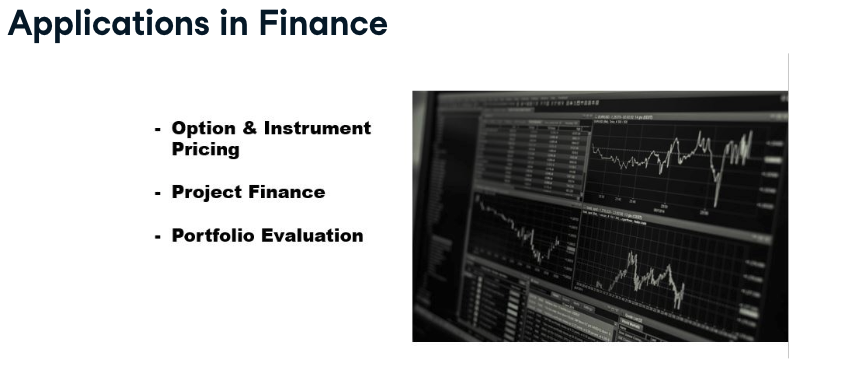

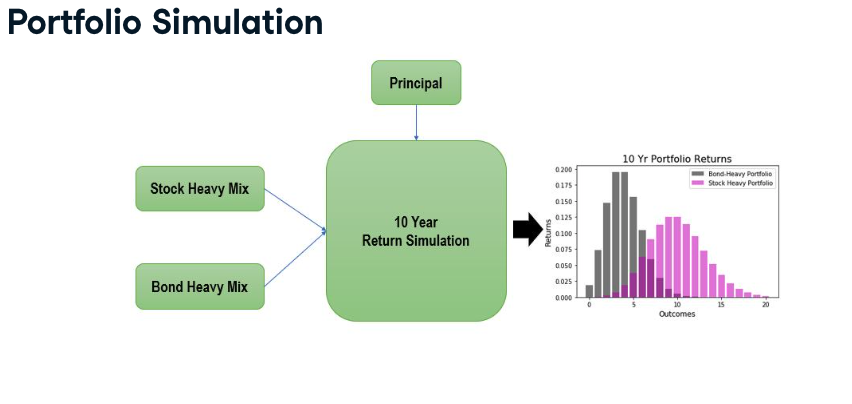


## Portfolio Simulation - Part I
In the next few exercises, you will calculate the expected returns of a stock portfolio & characterize its uncertainty.

Suppose you have invested $10,000 in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return). Assume the rate of return follows a normal distribution.

First, let's write a function that takes the principal (initial investment), number of years, expected rate of return and volatility as inputs and returns the portfolio's total value after 10 years.

Upon completion of this exercise, you will have a function you can call to determine portfolio performance.


### Instructions

- In the function definition, accept four arguments: number of years yrs, the expected rate of return avg_return, volatility sd_of_return, and principal (initial investment) principal as inputs.
- Simulate rates of return for each year as a normal random variable.
- Initialize end_return to the principal input. In the for loop, end_return is scaled up by the rate each year.
- Use portfolio_return() to calculate and print result.

In [67]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, sd_of_return, principal):
    np.random.seed(123)
    rates = np.random.normal(loc=avg_return, scale=sd_of_return, size=yrs)
    # Calculate the return at the end of the period
    end_return = principal
    for x in rates:
        end_return = end_return*(1+x)
    return end_return

result = portfolio_return(yrs = 5, avg_return = 0.07, sd_of_return = 0.15, principal = 1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1021.4013412039292


## Portfolio Simulation - Part II
Now we will use the simulation function you built to evaluate 10-year returns.

Your stock-heavy portfolio has an initial investment of $10,000, an expected return of 7% and a volatility of 30%. You want to get a 95% confidence interval of what your investment will be worth in 10 years. We will simulate multiple samples of 10-year returns and calculate the confidence intervals on the distribution of returns.

By the end of this exercise, you will have run a complete portfolio simulation.

The function portfolio_return() from the previous exercise is already initialized in the environment.

- Initialize sims to 1,000.
- Enter the appropriate values for the portfolio_return() function parameters.
- Calculate the 95% confidence interval lower (lower_ci) and upper limits (upper_ci).

In [68]:
# Run 1,000 iterations and store the results
sims, rets = 1000, []

for i in range(sims):
    rets.append(portfolio_return(yrs = 10, avg_return = 0.07, 
                                 volatility = 0.3, principal = 10000))

# Calculate the 95% CI
lower_ci = np.quantile(rets, 0.025)
upper_ci = np.quantile(rets, 0.975)
print("95% CI of Returns: Lower = {}, Upper = {}".format(lower_ci, upper_ci))

TypeError: portfolio_return() got an unexpected keyword argument 'volatility'

## Portfolio Simulation - Part III

Previously, we ran a complete simulation to get a distribution for 10-year returns. Now we will use simulation for decision making.

Let's go back to your stock-heavy portfolio with an expected return of 7% and a volatility of 30%. You have the choice of rebalancing your portfolio with some bonds such that the expected return is 4% & volatility is 10%. You have a principal of $10,000. You want to select a strategy based on how much your portfolio will be worth in 10 years. Let's simulate returns for both the portfolios and choose based on the least amount you can expect with 75% probability (25th percentile).

Upon completion, you will know how to use a portfolio simulation for investment decisions.

The portfolio_return() function is again pre-loaded in the environment.

* Set avg_return and volatility parameters to 0.07 and 0.3, respectively, for the stock portfolio.
* Set avg_return and volatility parameters to 0.04 and 0.1, respectively, for the bond portfolio.
* Calculate the 25th percentile of the distribution of returns for the stock rets_stock_perc and bond rets_bond_perc portfolios.
* Calculate and print how much additional returns additional_returns you would lose or gain by sticking with stocks instead of going to bonds.

In [69]:
for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, volatility = 0.3, principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, volatility = 0.1, principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.quantile(rets_stock, 0.25)
rets_bond_perc = np.quantile(rets_bond, 0.25)
additional_returns = rets_stock_perc - rets_bond_perc
print("Sticking to stocks gets you an additional return of {}".format(additional_returns))

NameError: name 'rets_stock' is not defined